In [10]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

In [1]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [3]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [5]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [6]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

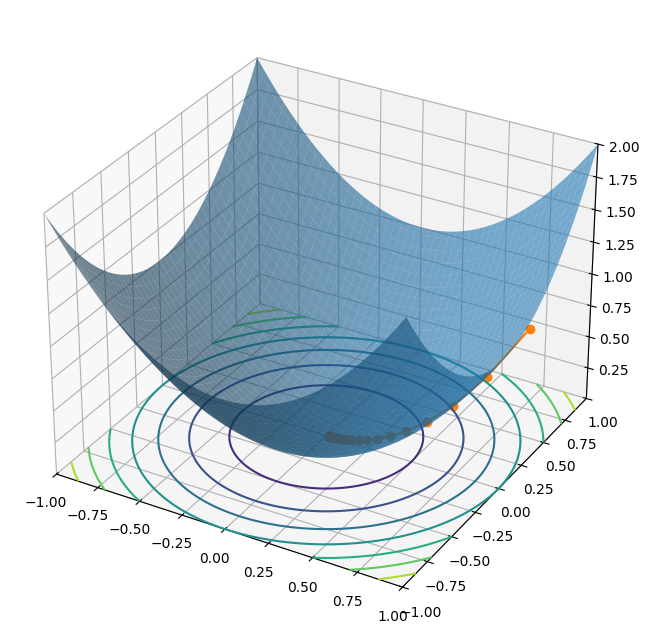

In [13]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

In [20]:
import sympy as sp

# Определяем переменные
x, y, z = sp.symbols('x y z')

# Определяем функцию
f = 2*x**2 - 4*x*z + 4*y**2 - 8*y*z + 9*z**2 + 4*x + 8*y - 20*z

# Вычисляем градиент
grad_f = [sp.diff(f, var) for var in (x, y, z)]
print(grad_f)

# Текущая точка
current_point = (0, 0, 0)

# Подставляем текущую точку в градиент
grad_at_current = [g.evalf(subs={x: current_point[0], y: current_point[1], z: current_point[2]}) for g in grad_f]
print(grad_at_current)

# Шаг градиентного спуска
alpha = 0.25

# Обновляем координаты
new_point = tuple(current_point[i] - alpha * grad_at_current[i] for i in range(3))

# Выводим результат
print("Координаты следующей точки:", [round(coord, 2) for coord in new_point])

print(alpha * grad_at_current[0])
print(alpha * grad_at_current[1])
print(alpha * grad_at_current[2])

[4*x - 4*z + 4, 8*y - 8*z + 8, -4*x - 8*y + 18*z - 20]
[4.00000000000000, 8.00000000000000, -20.0000000000000]
Координаты следующей точки: [-1.00000000000000, -2.00000000000000, 5.00000000000000]
1.00000000000000
2.00000000000000
-5.00000000000000
